<a href="https://colab.research.google.com/github/itsmir24/Working-in-Python/blob/main/Data_Manipulation_in_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [49]:
Data1=files.upload()

Saving emp_data.csv to emp_data.csv


In [50]:
Data2=files.upload()

Saving salary.csv to salary.csv


In [52]:
df1=pd.read_csv("/content/emp_data.csv")

In [53]:
df2=pd.read_csv("/content/salary.csv")

In [54]:
df1.head()

,EmployeeID,Name,Department
0,101,Employee 1,Engineering
1,102,Employee 2,HR
2,103,Employee 3,HR
3,104,Employee 4,Engineering
4,105,Employee 5,Finance


In [55]:
df2.head()

,EmployeeID,Salary (USD)
0,101,68864
1,102,60770
2,103,95817
3,104,85871
4,105,84618


In [56]:
#concat only the salary column from df2
concat_df=pd.concat([df1,df2['Salary (USD)']],axis=1)
concat_df

,EmployeeID,Name,Department,Salary (USD)
0,101,Employee 1,Engineering,68864
1,102,Employee 2,HR,60770
2,103,Employee 3,HR,95817
3,104,Employee 4,Engineering,85871
4,105,Employee 5,Finance,84618
5,106,Employee 6,Marketing,80366
6,107,Employee 7,HR,85982
7,108,Employee 8,Sales,85024
8,109,Employee 9,Engineering,71620
9,110,Employee 10,Sales,95105


In [57]:
#merge
df=pd.merge(df1,df2,on="EmployeeID", how='inner')
df.shape

(20, 4)

In [58]:
#rechecking that tere is no data loss
df1.shape

(20, 3)

In [59]:
#rechecking that tere is no data loss
df2.shape

(20, 2)

In [60]:
#calculate the Quartiles and IQR
q1=df['Salary (USD)'].quantile(0.25)
q3=df['Salary (USD)'].quantile(0.75)
print("Q1:",q1)
print("Q3:",q3)
IQR=q3-q1
print("IQR:",IQR)

Q1: 70829.75
Q3: 91446.5
IQR: 20616.75


In [61]:
#threshold
lb=q1-1.5*IQR
ub=q3+1.5*IQR
print("Lower Bound:",lb)
print("Upper Bound:",ub)

#outliers
outliers=df[(df['Salary (USD)']<lb) | (df['Salary (USD)']>ub)]
outliers

Lower Bound: 39904.625
Upper Bound: 122371.625


,EmployeeID,Name,Department,Salary (USD)


<Axes: xlabel='Salary (USD)'>

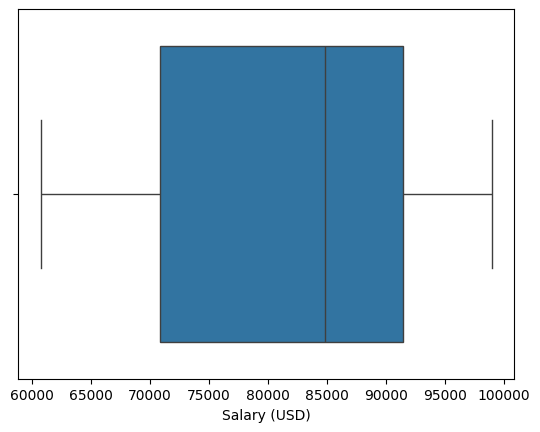

In [62]:
sns.boxplot(x='Salary (USD)', data=df)

In [63]:
df.columns

Index(['EmployeeID', 'Name', 'Department', 'Salary (USD)'], dtype='object')

In [64]:
Dummy=pd.DataFrame({'EmployeeID':[121,122],'Name':['Abishek','Chandler'],'Department':['IT','Marketing'],'Salary (USD)':[280000,300000]})

In [65]:
Dummy

,EmployeeID,Name,Department,Salary (USD)
0,121,Abishek,IT,280000
1,122,Chandler,Marketing,300000


In [66]:
#concat the new data with the existing one here asis=0 so that it adds the rows
df=pd.concat([df,Dummy],axis=0)
df

,EmployeeID,Name,Department,Salary (USD)
0,101,Employee 1,Engineering,68864
1,102,Employee 2,HR,60770
2,103,Employee 3,HR,95817
3,104,Employee 4,Engineering,85871
4,105,Employee 5,Finance,84618
5,106,Employee 6,Marketing,80366
6,107,Employee 7,HR,85982
7,108,Employee 8,Sales,85024
8,109,Employee 9,Engineering,71620
9,110,Employee 10,Sales,95105


In [67]:
#reseting index drop=True because it would drop the additional index column created by reset index
df.reset_index(drop=True,inplace=True)
df

,EmployeeID,Name,Department,Salary (USD)
0,101,Employee 1,Engineering,68864
1,102,Employee 2,HR,60770
2,103,Employee 3,HR,95817
3,104,Employee 4,Engineering,85871
4,105,Employee 5,Finance,84618
5,106,Employee 6,Marketing,80366
6,107,Employee 7,HR,85982
7,108,Employee 8,Sales,85024
8,109,Employee 9,Engineering,71620
9,110,Employee 10,Sales,95105


In [68]:
df.duplicated().sum()

0

In [69]:
#access the dupliactes value
df[df.duplicated()==True]

,EmployeeID,Name,Department,Salary (USD)


In [70]:
df.drop_duplicates(inplace=True)
df

,EmployeeID,Name,Department,Salary (USD)
0,101,Employee 1,Engineering,68864
1,102,Employee 2,HR,60770
2,103,Employee 3,HR,95817
3,104,Employee 4,Engineering,85871
4,105,Employee 5,Finance,84618
5,106,Employee 6,Marketing,80366
6,107,Employee 7,HR,85982
7,108,Employee 8,Sales,85024
8,109,Employee 9,Engineering,71620
9,110,Employee 10,Sales,95105


In [ ]:
#calculate the Quartiles and IQR
q1=df['Salary (USD)'].quantile(0.25)
q3=df['Salary (USD)'].quantile(0.75)
print("Q1:",q1)
print("Q3:",q3)
IQR=q3-q1
print("IQR:",IQR)

Q1: 71518.75
Q3: 95639.0
IQR: 24120.25


In [71]:
#threshold
lb=q1-1.5*IQR
ub=q3+1.5*IQR
print("Lower Bound:",lb)
print("Upper Bound:",ub)

#outliers
outliers=df[(df['Salary (USD)']<lb) | (df['Salary (USD)']>ub)]
outliers

Lower Bound: 39904.625
Upper Bound: 122371.625


,EmployeeID,Name,Department,Salary (USD)
20,121,Abishek,IT,280000
21,122,Chandler,Marketing,300000


In [72]:
#how we can remove outliers? we can use logarthmic transformation to minimize the effects
#it will bring the salary in standardize form
df['Salary (USD)']=np.log1p(df['Salary (USD)'])
df

,EmployeeID,Name,Department,Salary (USD)
0,101,Employee 1,Engineering,11.139903
1,102,Employee 2,HR,11.014868
2,103,Employee 3,HR,11.470206
3,104,Employee 4,Engineering,11.360613
4,105,Employee 5,Finance,11.345914
5,106,Employee 6,Marketing,11.294359
6,107,Employee 7,HR,11.361905
7,108,Employee 8,Sales,11.350701
8,109,Employee 9,Engineering,11.179144
9,110,Employee 10,Sales,11.462747


In [73]:
#set the index  that is making employeeID as index
df.set_index('EmployeeID',inplace=True)
df

,Name,Department,Salary (USD)
EmployeeID,,,
101,Employee 1,Engineering,11.139903
102,Employee 2,HR,11.014868
103,Employee 3,HR,11.470206
104,Employee 4,Engineering,11.360613
105,Employee 5,Finance,11.345914
106,Employee 6,Marketing,11.294359
107,Employee 7,HR,11.361905
108,Employee 8,Sales,11.350701
109,Employee 9,Engineering,11.179144


In [74]:
#sort in descending order (although by default it is ascending)
df.sort_index(ascending=False)

,Name,Department,Salary (USD)
EmployeeID,,,
122,Chandler,Marketing,12.611541
121,Abishek,IT,12.542548
120,Employee 20,Marketing,11.501865
119,Employee 19,HR,11.487177
118,Employee 18,Finance,11.407298
117,Employee 17,Engineering,11.276849
116,Employee 16,HR,11.118489
115,Employee 15,HR,11.502572
114,Employee 14,Finance,11.076326


In [75]:
#sort by particular column
df.sort_values(by='Salary (USD)' , ascending =False)

,Name,Department,Salary (USD)
EmployeeID,,,
122,Chandler,Marketing,12.611541
121,Abishek,IT,12.542548
115,Employee 15,HR,11.502572
120,Employee 20,Marketing,11.501865
119,Employee 19,HR,11.487177
103,Employee 3,HR,11.470206
110,Employee 10,Sales,11.462747
112,Employee 12,Marketing,11.410095
118,Employee 18,Finance,11.407298


In [78]:
pivot_table_avg_salary=df.pivot_table(values='Salary (USD)',index="Department",aggfunc="mean")

pivot_table_employee_count=df.pivot_table(values="Name",index="Department",aggfunc="count")

# pivot_table_max_min_salary_by_age =df.pivot_table( values='Salary (USD)', index='Age', aggfunc={'Salary (USD)': ['max', 'min']})
total_salary_cost_by_department=df.groupby(['Department'])['Salary (USD)'].sum()

print(pivot_table_avg_salary)
print(pivot_table_employee_count)
# print(pivot_table_max_min_salary_by_age)
print(total_salary_cost_by_department)

             Salary (USD)
Department               
Engineering     11.219134
Finance         11.276513
HR              11.304639
IT              12.542548
Marketing       11.704465
Sales           11.406724
             Name
Department       
Engineering     5
Finance         3
HR              7
IT              1
Marketing       4
Sales           2
Department
Engineering    56.095671
Finance        33.829538
HR             79.132474
IT             12.542548
Marketing      46.817860
Sales          22.813448
Name: Salary (USD), dtype: float64


Write a Python program to import the data from the CSV file into Python and concatenate the existing data with the new data given above.
1. Make sure to also remove the duplicate records from the combined dataframe.
2. Show the common data between both the new and existing data table using EmployeeName as the common key.

Note: The data is already uploaded for the purpose of practice, Please import the file "employee_data.csv" using Pandas.

New Data:
data = { 'EmployeeName': ['Karishma', 'Rena', 'Ragesh','Eve'], 'Age': [30, 29, 30,31], 'Department': ['Content', 'Manager', 'Editor','HR'], 'Salary': [95000, 90000, 90000,72000] }

In [ ]:
# import pandas as pd
# employee_df=pd.read_csv("employee_data.csv")
# data = { 'EmployeeName': ['Karishma', 'Rena', 'Ragesh','Eve'], 'Age': [30, 29, 30,31], 'Department': ['Content', 'Manager', 'Editor','HR'], 'Salary': [95000, 90000, 90000,72000] }#To save new data
# new_employee_data_df=pd.DataFrame(data)
# combined_df =pd.concat([employee_df,new_employee_data_df], axis=0)#To save the conctenated data
# combined_df_no_duplicates = combined_df.drop_duplicates()
# merged_df=pd.merge(employee_df,new_employee_data_df,on="EmployeeName",how='inner') #To save merged data

# print("Combined Datatable:\n",combined_df_no_duplicates)
# print("Common records between the new and existing datatable:\n",merged_df)

**Problem:We have a dataset containing information about tips in a restaurant ,including total bills,tip amounts, and customer characteristics.**
we want to perform the following tasks:
*   Create Pivot table to summarize the total bill amounts by day of the week and time(launch or dinner).
*   Calculate the average tip amount and total bill amount for each day of the week.
*   Identify the day of the week with the highest average tip.




In [4]:
Data3=files.upload()

Saving tips.csv to tips.csv


In [5]:
df_t=pd.read_csv("/content/tips.csv")

In [6]:
df_t

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...,...
239,239,29.03,5.92,Male,No,Sat,Dinner,3
240,240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,242,17.82,1.75,Male,No,Sat,Dinner,2


In [7]:
df_t.isnull().sum()

,0
Unnamed: 0,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [8]:
#drop unnamed column
df_t.drop('Unnamed: 0',axis=1,inplace=True)

In [9]:
df_t.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [10]:
df_t.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [11]:
df_t.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [12]:
df_t.pivot_table(values='total_bill',index='day',columns='time',aggfunc='sum')

time,Dinner,Lunch
day,,
Fri,235.96,89.92
Sat,1778.40,NaN
Sun,1627.16,NaN
Thur,18.78,1077.55


In [14]:
#nobody turned up for lunch
df_t[(df_t["day"]=='Sun')&(df_t["time"]=='Lunch')]

,total_bill,tip,sex,smoker,day,time,size


In [15]:
#filling the values where there is no one for lunch
df_t.pivot_table(values='total_bill',index='day',columns='time',aggfunc='sum',fill_value= 0)

time,Dinner,Lunch
day,,
Fri,235.96,89.92
Sat,1778.40,0.00
Sun,1627.16,0.00
Thur,18.78,1077.55


In [16]:
grouped_df=df_t.groupby('day')

In [17]:
#get_group fuction is used to get the output
#here it will pull all the datas for sundays
grouped_df.get_group('Sun')

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
186,20.90,3.50,Female,Yes,Sun,Dinner,3
187,30.46,2.00,Male,Yes,Sun,Dinner,5
188,18.15,3.50,Female,Yes,Sun,Dinner,3
189,23.10,4.00,Male,Yes,Sun,Dinner,3


In [18]:
grouped_df=df_t.groupby(['day','time'])

In [20]:
#giving all the data for sunday dinner time
grouped_df.get_group(('Sun','Dinner'))

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
186,20.90,3.50,Female,Yes,Sun,Dinner,3
187,30.46,2.00,Male,Yes,Sun,Dinner,5
188,18.15,3.50,Female,Yes,Sun,Dinner,3
189,23.10,4.00,Male,Yes,Sun,Dinner,3


In [40]:
# to get multiple aggregation use agg function
grouped_df1=df_t.groupby('day').agg({'total_bill':'sum','tip':'mean'})
grouped_df1

,total_bill,tip
day,,
Fri,325.88,2.734737
Sat,1778.40,2.993103
Sun,1627.16,3.255132
Thur,1096.33,2.771452


In [37]:
#this is without agg to group data based on single aggregation.
df_t.groupby('sex')[['total_bill', 'tip']].median()

,total_bill,tip
sex,,
Female,16.40,2.75
Male,18.35,3.00


In [46]:
# day with highest average tip
# we can use conditional slicing
grouped_df1[grouped_df1['tip']==grouped_df1['tip'].max()]

,total_bill,tip
day,,
Sun,1627.16,3.255132


In [48]:
#lowest average tip
grouped_df1[grouped_df1['tip']==grouped_df1['tip'].min()]

,total_bill,tip
day,,
Fri,325.88,2.734737
